Расчет молекулярной массы пектина косвенным методом по определению вязкости растворов с помощью вискозиметра Уббелоде 1

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data = pd.DataFrame(
    {
        'C': [0.1, 0.2, 0.3, 0.4, 0.5],
        'T1': [16.36, 21.17, 26.06, 32.47, 41.11],
        'T2': [16.58, 21.17, 26.15, 32.50, 41.09]
    }
)

data

,C,T1,T2
0,0.1,16.36,16.58
1,0.2,21.17,21.17
2,0.3,26.06,26.15
3,0.4,32.47,32.50
4,0.5,41.11,41.09


In [4]:
T_H2O = sum([10.83, 10.82])/2
data['T'] = data[['T1', 'T2']].mean(axis=1)
data = data.drop(['T1', 'T2'], axis=1)

data['n_уд'] = (data['T']-T_H2O)/T_H2O

data['n_прив'] = data['n_уд']/data['C']

data['n_отн'] = data['T']/T_H2O

data['ln(n_отн)/C'] = np.log(data['n_отн'])/data['C']

data = data.round(2)

data

,C,T,n_уд,n_прив,n_отн,ln(n_отн)/C
0,0.1,16.47,0.52,5.21,1.52,4.20
1,0.2,21.17,0.96,4.78,1.96,3.35
2,0.3,26.10,1.41,4.71,2.41,2.93
3,0.4,32.48,2.00,5.00,3.00,2.75
4,0.5,41.10,2.80,5.59,3.80,2.67


Характеристическая вязкость = 4.76
R2 = 0.189


Text(-0.07, 4.79, '[n]=4.76')

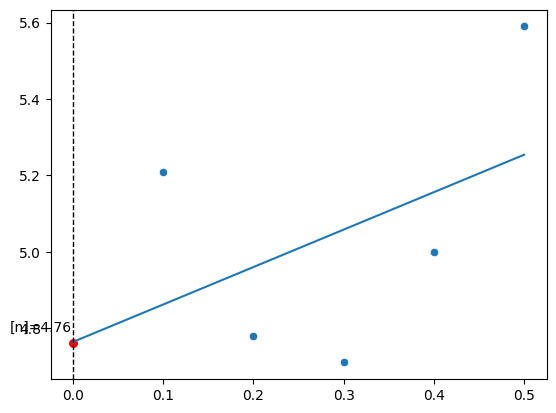

In [5]:
# from sklearn.preprocessing import PolynomialFeatures

X = data['C'].to_numpy().reshape(-1, 1)
y = data['n_прив'].to_numpy().reshape(-1, 1)

# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X=X, y=y)
y_pred = model.predict(X)

X_line = np.linspace(0, 0.5, 10).reshape(-1, 1)
y_pred_line = model.predict(X_line)

n = model.intercept_[0].round(2)
print(f'Характеристическая вязкость = {n}')
print(f'R2 = {r2_score(y, y_pred):.3f}')

# X_line = np.linspace(0, 0.5, 100).reshape(-1, 1)
# X_line_poly = poly.fit_transform(X_line)
# y_pred_line = model.predict(X_line_poly)

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_line.ravel(), y=y_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n, color='red', s=30)
plt.text(-0.07, n + 0.03, f'[n]={n}', fontsize=10, color='black')

Характеристическая вязкость = 4.28
R2 = 0.850


(2.5, 5.5)

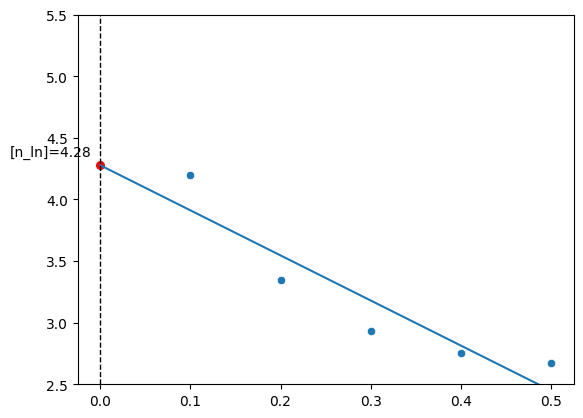

In [6]:
X = data['C'].to_numpy().reshape(-1, 1)
y_ln = data['ln(n_отн)/C'].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(X=X, y=y_ln)
y_ln_pred = model.predict(X)
X_ln_line = np.linspace(0, 0.5, 10).reshape(-1, 1)
y_ln_pred_line = model.predict(X_ln_line)

n_ln = model.intercept_[0].round(2)
print(f'Характеристическая вязкость = {n_ln}')
print(f'R2 = {r2_score(y_ln, y_ln_pred):.3f}')

sns.scatterplot(x=X.ravel(), y=y_ln.ravel())
sns.lineplot(x=X_ln_line.ravel(), y=y_ln_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n_ln, color='red', s=30)
plt.text(-0.1, n_ln + 0.07, f'[n_ln]={n_ln}', fontsize=10, color='black')
plt.ylim(2.5, 5.5)

[n] = 4.76 | Молекулярная масса = 41.67 кДа
[n_ln] = 4.28 | Молекулярная масса (ln) = 38.20 кДа

Таблица с данными:
     C      T  n_уд  n_прив  n_отн  ln(n_отн)/C
0  0.1  16.47  0.52    5.21   1.52         4.20
1  0.2  21.17  0.96    4.78   1.96         3.35
2  0.3  26.10  1.41    4.71   2.41         2.93
3  0.4  32.48  2.00    5.00   3.00         2.75
4  0.5  41.10  2.80    5.59   3.80         2.67


Text(-0.1, 4.3500000000000005, '[n_ln]=4.28')

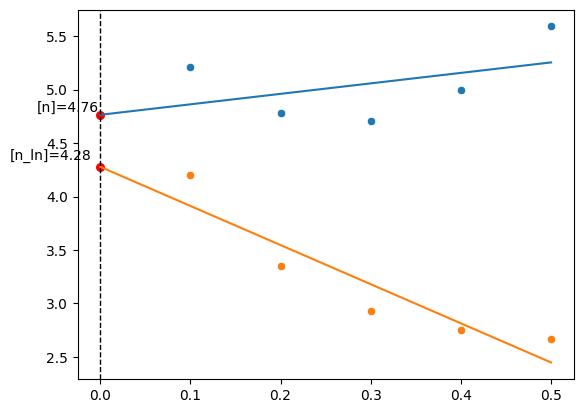

In [7]:
K = 1.1*10**(-5)
a = 1.22

MM = (n/K)**(1/1.22)/1000
print(f'[n] = {n} | Молекулярная масса = {MM:.2f} кДа')

MM_ln = (n_ln/K)**(1/1.22)/1000
print(f'[n_ln] = {n_ln} | Молекулярная масса (ln) = {MM_ln:.2f} кДа')

print(f'\nТаблица с данными:\n{data}')

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_line.ravel(), y=y_pred_line.ravel())
sns.scatterplot(x=X.ravel(), y=y_ln.ravel())
sns.lineplot(x=X_ln_line.ravel(), y=y_ln_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n, color='red', s=30)
plt.scatter(0, n_ln, color='red', s=30)
plt.text(-0.07, n + 0.03, f'[n]={n:.2f}', fontsize=10, color='black')
plt.text(-0.1, n_ln + 0.07, f'[n_ln]={n_ln:.2f}', fontsize=10, color='black')